<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [which team won the highest number of the matches?](#section401)<br/>
    - 4.2 [which player have the more MOM's?](#section402)<br/>
    - 4.3 [Total number of Matches played in each season?](#section403)<br/>
    - 4.4 [Does winning the toss has any advantage?](#section404)<br/>
    - 4.5 [Upon winning the toss  selecting the fielding or bating](#section405)<br/>
    - 4.6 [Is the team by strong boilng or batting won most of the matches](#section406)<br/>
    - 4.7 [how is dl applied affecting the game](#section407)<br/>
    - 4.8 [Total Win and loose of each team](#section408)<br/>
    - 4.9 [Is there any home field advantage](#section409)<br/>
 5. [Hypothesis](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

IPL is one of the most popular cricket tournaments in the world and This dataset is having the IPL matches data from the yearend 2008 to 2018.Analyse the data the draw the conclusion   


<a id=section2></a>

### 2. Data Loading and Description


<a id=section201></a>

- The dataset comprises of __696 observations of 18  columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Season        | Year inwhich the match was played                         |               
| city          | In chich city the match was played                        |  
| team1         | Batting team                                              |
| team2         | Bowling team                                              |
| winner        | winning team                                              |
| win by runs   | runs by which team won                                    |     
| win by wickets| wickets by which team won                                 |
|player of the match | Player who won the MOM award                         |
| umpire1       | 1st umpire                                                |
| umpire2       | 2nd umpire                                                |
                                             

#### Some Background Information
The Indian Premier League (IPL), officially Vivo Indian Premier League for sponsorship reasons, is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing 8 Indian cities and some states.
The league was founded by the Board of Control for Cricket in India (BCCI) in 2008

#### Importing packages                                          

In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling as pp
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



In [ ]:
#### Importing the Dataset

In [3]:
Matches_data=pd.read_csv("C:\\Users\\Compaq\\Downloads\\Term-1-master\\Term-1-master\\Data\\Projects\\matches.csv")
Matches_data.shape # This will print the number of rows and comlumns of the Data Frame
Matches_data.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


 Matches_data has 696 rows and 18 columns.

## 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding the Dataset

Data can be analysed in brief by the below 


In [4]:
Matches_data.info()# This will give Index, Datatype and Memory information
Matches_data.season.unique()
Matches_data.describe()
Matches_data.isnull().sum()
print(Matches_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 62.6+ KB
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    

The umpire3 column has the maximun number of null values

<a id=section302></a>

### 3.2 Pre Profiling

Instead of following the above mentioned steps the easy way to analyse the data is by profiling

In [ ]:
profile=pp.ProfileReport(Matches_data)
profile.to_file(outputfile="Matches_datanew.html")


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as _Matches_datanew.html_. We can open the file and we can see the detailed analysis of all the variables.

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of umpire1,umpire2 with mode.
    - Replacing missing values of City with mode values.
    - Dropping the column __'Umpire3'__ as it has more than 90% of missing values.
    - Duplicate names are there for the team Rising Pune Supergiant need to replace with single name
    - Player of the match and winner columns are having missing values but thoese are genuine cases(Values were missed because of the No result ) 

In [5]:
for column in ['city','umpire1', 'umpire2']:
    Matches_data[column].fillna(Matches_data[column].mode()[0], inplace=True)
    

In [6]:
Matches_data.drop(columns='umpire3',axis=1,inplace=True) #dropping the columns as we has so many missing values(more than 90%)

Matches_data['winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)



## 3.4 Post Pandas Profiling

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(Matches_data)
  
profile.to_file(outputfile="Matches_datanew_after_preprocessing.html")

Now we have preprocessed the data,and almost all the missing cases has been removed and the data can be analysed now

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Which team won highest number of the matches

AxesSubplot(0.125,0.125;0.775x0.755)


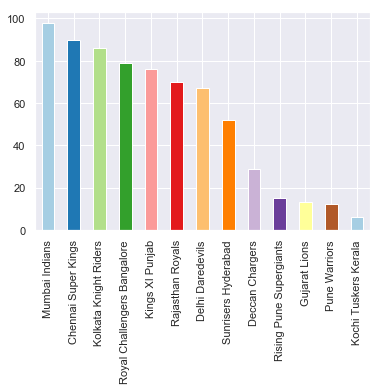

In [22]:
print(Matches_data['winner'].value_counts().plot.bar())

In [ ]:
print(Matches_data['winner'].value_counts())#we can get the exact number of winning team counts 

Mumbai indains has won most of the matches folowed by chennai super kings.From the above plot we can tell Mumbai indians is the most successful IPL team so far

<a id=section402></a>

### 4.2 which player have the more MOM's

AxesSubplot(0.125,0.125;0.775x0.755)


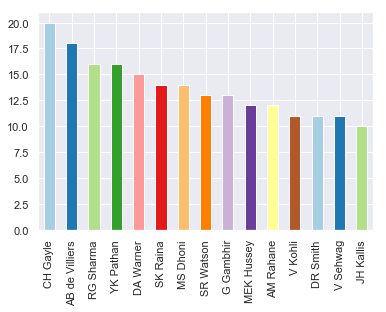

In [23]:
print(Matches_data['player_of_match'].value_counts().head(15).plot.bar())

In [31]:
print(Matches_data['player_of_match'].value_counts())

CH Gayle           20
AB de Villiers     18
RG Sharma          16
YK Pathan          16
DA Warner          15
SK Raina           14
MS Dhoni           14
SR Watson          13
G Gambhir          13
MEK Hussey         12
AM Rahane          12
V Kohli            11
DR Smith           11
V Sehwag           11
JH Kallis          10
A Mishra           10
KA Pollard          9
SP Narine           9
SE Marsh            9
AT Rayudu           9
SR Tendulkar        8
UT Yadav            8
RA Jadeja           8
AD Russell          7
RV Uthappa          7
AC Gilchrist        7
Harbhajan Singh     6
A Nehra             6
Rashid Khan         6
M Vijay             6
                   ..
DJG Sammy           1
Q de Kock           1
A Chandila          1
S Sohal             1
TG Southee          1
TM Dilshan          1
KMDN Kulasekara     1
Shoaib Akhtar       1
AS Yadav            1
S Sreesanth         1
SB Wagh             1
MN Samuels          1
Mohammed Siraj      1
VR Aaron            1
AC Voges  

Chris Gayle has recived most of the MOM's and so far the top player followed by AB de Villers and YK Pathan

### 4.3.Total number of Matches played in each season

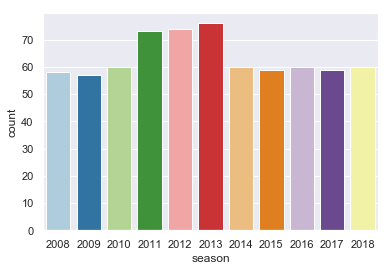

In [32]:
sns.countplot(x='season', data=Matches_data)
plt.show()

<a id=section404></a>

In [33]:
(Matches_data.groupby('season').count()).id# This will show the total number of matches played for each season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: id, dtype: int64

In [ ]:
Highest number of matches were played in 2013

### 4.4 Does winning the toss has any advantage

In [26]:
Matches_data['tosswinner']=Matches_data['toss_winner'].str.replace(' ','')
Matches_data['winner_new']=Matches_data['winner'].str.replace(' ','')
Matches_data['toss_win_team']=Matches_data['tosswinner']==Matches_data['winner_new']
Matches_data['toss_win_team'].groupby(Matches_data['toss_win_team']==True).count()


toss_win_team
False    344
True     352
Name: toss_win_team, dtype: int64

In [ ]:
-Looks like winning the toss has not actually helps in winning the match

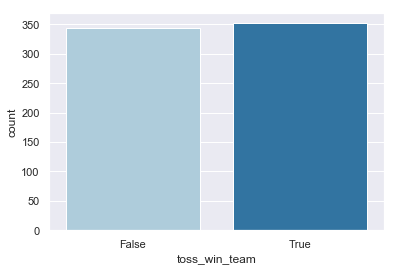

In [34]:
sns.countplot(Matches_data['toss_win_team']);

### 4.5. Upon winning the toss  selecting the fielding or bating

In [27]:
print(Matches_data.loc[Matches_data['toss_win_team']==True,'toss_decision'].groupby(Matches_data['toss_decision']).count())

toss_decision
bat      129
field    223
Name: toss_decision, dtype: int64


Fileding team has more chances of winning the game

<a id=section406></a>

### 4.6 Is the team by strong boilng or batting won most of the matches(won by wickets)

In [35]:
print((Matches_data['win_by_wickets'].groupby(Matches_data['win_by_wickets'] >=1)).count())


win_by_wickets
False    325
True     371
Name: win_by_wickets, dtype: int64


In [42]:
print(Matches_data.winner[Matches_data.win_by_wickets!=0].mode())#best chasing team


0    Kolkata Knight Riders
dtype: object


In [43]:
#print(Matches_data.iloc[Matches_data['win_by_runs'].idxmax()])#best batting team
print(Matches_data.winner[Matches_data.win_by_runs !=0].mode())

0    Mumbai Indians
dtype: object


-Best batting team is mumbai indians and Best bowling team is Kolkata Knight Riders
-Strong batting team has more chances of winning the game

<a id=section407></a>

### 4.7 how is dl applied affecting the game

In [45]:
df1=Matches_data.loc[Matches_data['dl_applied'] == 1]
print(df1['id'].count())
df1['team_new1']=df1['team1'].str.replace(' ','')
df1['winner_new']=df1['winner'].str.replace(' ','')
df1['dl_analysis']=df1['team_new1']==df1['winner_new']
df1['dl_analysis'].groupby(df1['dl_analysis']==True).count()

19


C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

dl_analysis
False    14
True      5
Name: dl_analysis, dtype: int64

- When dl is applied Bowling team has high chances of winning the game  

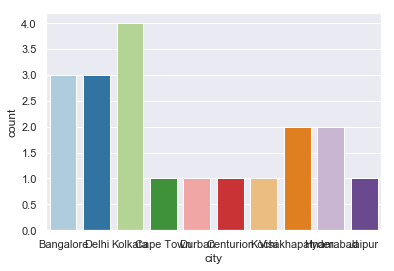

In [28]:
sns.countplot(Matches_data.city[Matches_data['dl_applied'] == 1])

- Kolkata is the most affected city due to whether and so the dl is mostly applied in kolkata

<a id=section410></a>

### 4.8 Total Win and loose of each team

                    toss_winner result  count
0           Chennai Super Kings   lost     27
1           Chennai Super Kings    won     50
2               Deccan Chargers   lost     24
3               Deccan Chargers    won     19
4              Delhi Daredevils   lost     44
5              Delhi Daredevils    won     35
6                 Gujarat Lions   lost      5
7                 Gujarat Lions    won     10
8               Kings XI Punjab   lost     43
9               Kings XI Punjab    won     32
10         Kochi Tuskers Kerala   lost      4
11         Kochi Tuskers Kerala    won      4
12        Kolkata Knight Riders   lost     38
13        Kolkata Knight Riders    won     49
14               Mumbai Indians   lost     40
15               Mumbai Indians    won     50
16                Pune Warriors   lost     17
17                Pune Warriors    won      3
18             Rajasthan Royals   lost     31
19             Rajasthan Royals    won     37
20       Rising Pune Supergiant   

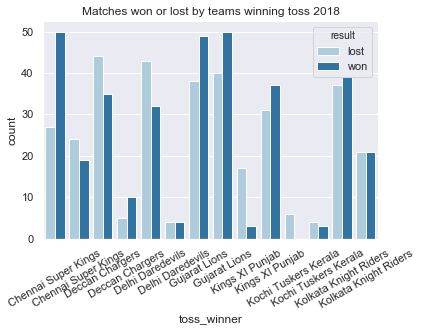

In [39]:
toss = Matches_data.groupby(['toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['toss_winner','result'])['count'].sum().reset_index()
print(toss_result)

plot=sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result)
plot.set_title('Matches won or lost by teams winning toss ' +str(x))
plot.set_xticklabels(toss_result['toss_winner'],rotation=30)
plt.show()
    



Observing the diagonal elements,
-From the above plot and count we can tell chennai super kings and mumbai indians has the highest number of wins 
-Deccan chargers is the team with highest number of losses 

<a id=section411></a>

### 4.9 Is there any home field advantage

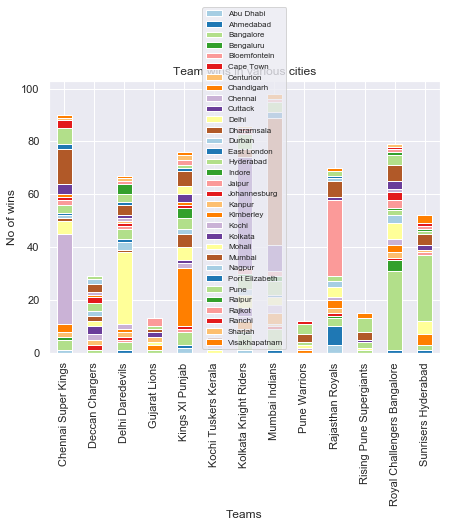

In [40]:
wins_versus_city = Matches_data.groupby(['winner', 'city'])['id'].count().unstack()
plot = wins_versus_city.plot(kind='bar', stacked=True, title="Team wins in various cities", figsize=(7, 5))
sns.set_palette("Paired", len(Matches_data['city'].unique()))
plot.set_xlabel("Teams")
plot.set_ylabel("No of wins")
plot.legend(loc='best', prop={'size':8})

As this is hard to infer data from this plot ,we can analyse seperately for each season

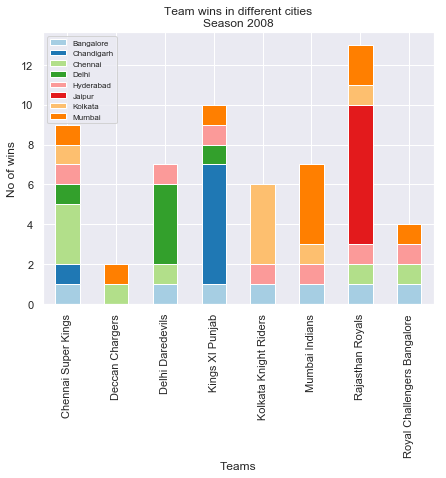

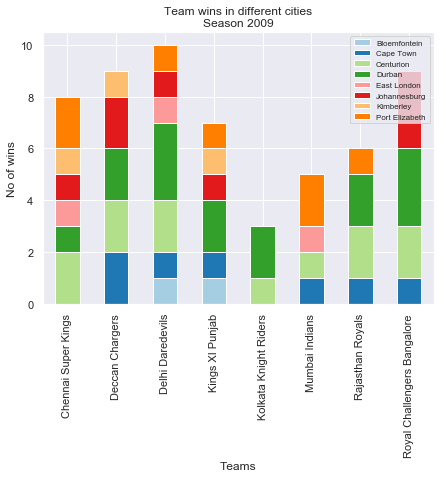

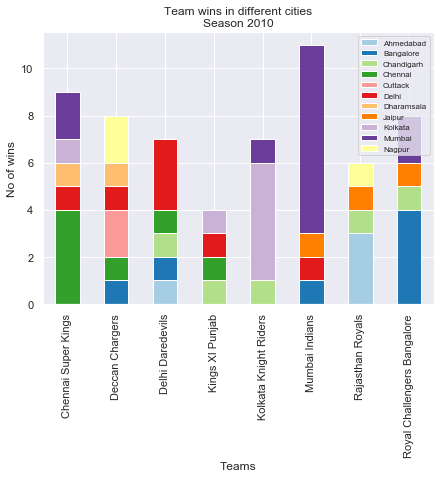

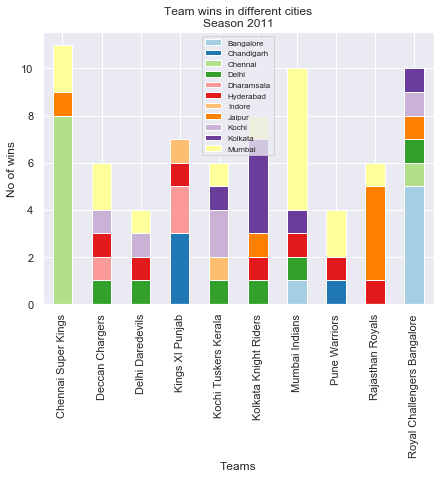

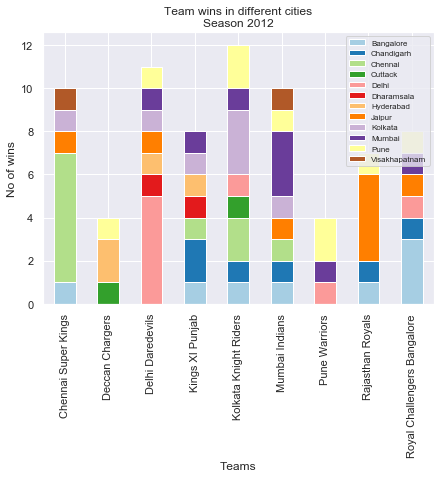

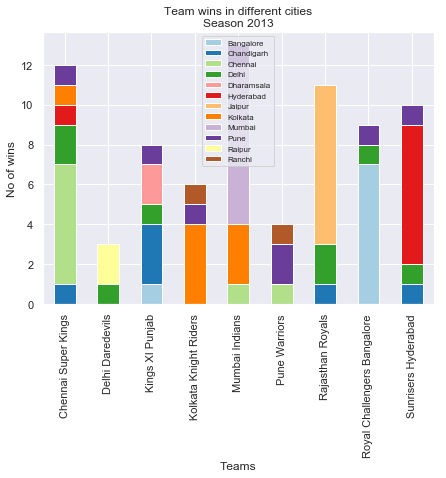

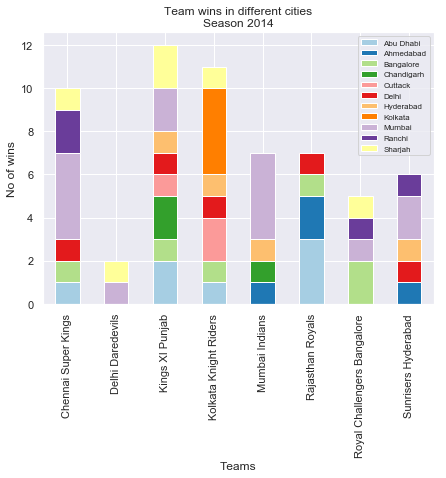

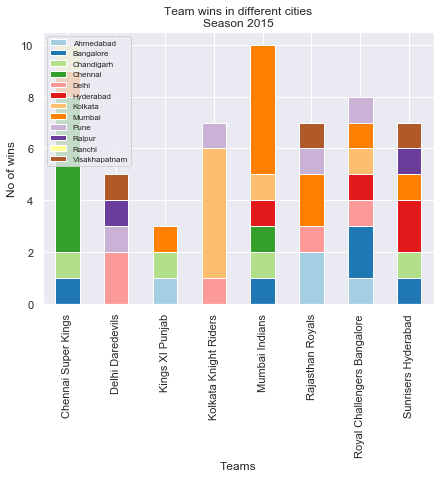

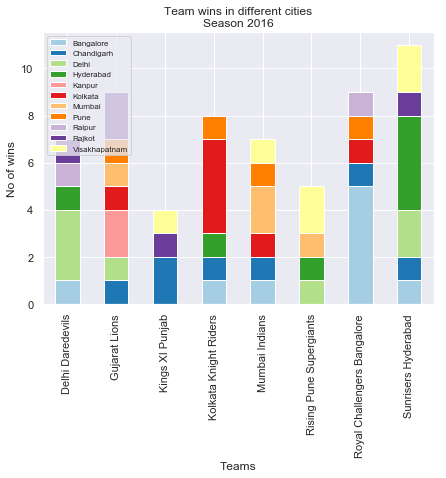

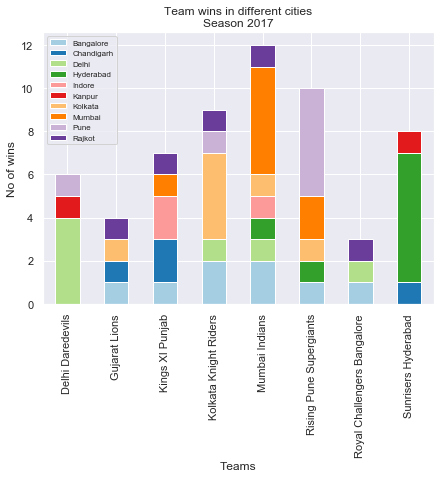

In [11]:
#No of wins by team and season in each city
x, y = 2008, 2018
while x < y:
    wins_versus_city = Matches_data[Matches_data['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_versus_city.plot(kind='bar', stacked=True, title="Team wins in various cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(Matches_data['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

- Clearly accross evary season we can see there is a home field advantage 

<a id=section412></a>

Hypothesis: Mumbai indians and chennai super kings has high chances of winning the next season

On studying Questionnaire,we observed that 
- Winning the toss has an advantage of winning the game
- There is home field advantage for the teams
- dl applied matches favoures the fileding team
- mumbai and chennai has high chances of winning 


<a id=section5></a>